#### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np

---

#### IMPORT DATASET

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy() 

---

#### LENGTH OF THE TIME PERIOD

In [3]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

As our DATE Column is not set to Datatime.
Python is taking DATE Columns as INTEGAR Values and picking on value as TOP

---

#### COVERTING DATE COLUMN pd.to_datetime FORMAT

In [6]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)

As our DATE Column has dd/mm/yyyy format, we need to set < dayfirst = True > in this case.

Otherwise the default format will be choosen, i.e. mm/dd/yyyy

In [7]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [8]:
df_comp.date.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

---

#### SETTING DATE COLUMN AS INDEX

In [10]:
df_comp.set_index("date", inplace=True)

In [11]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


---

df_comp.date.describe() #Expect to get an error message because we no longer have a "date" column since it is the index

In [12]:
df_comp.date.describe()

AttributeError: 'DataFrame' object has no attribute 'date'

---

#### SETTING THE DESIRED FREQUENCY

Different Types of FREQUENCY are mentioned in below link:

https://pandas.pydata.org/pandas-docs/version/0.9.1/timeseries.html

d = daily

w = Weekly

a = Annual


In [13]:
df_comp = df_comp.asfreq('d')

In [15]:
df_comp.head(15)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26
1994-01-14,474.91,2151.05,3400.56,18973.70
1994-01-15,NaN,NaN,NaN,NaN


As seen we have 2 Nan Values after every 5 days, which were not there before setting frequency to 'd'.

That is because, Python has included weekend also, which doesn't have any values as we are dealing with stock data.

To avoid this happening we need to adjust the < .asfreq('b') > to 'b', which indicates BUSINESS_DAY

In [16]:
df_comp = df_comp.asfreq('b')

In [17]:
df_comp.head(15)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26
1994-01-14,474.91,2151.05,3400.56,18973.70
1994-01-17,473.30,2115.56,3407.83,18725.37
1994-01-18,474.25,2130.35,3437.01,18514.55
1994-01-19,474.30,2132.52,3475.15,19039.40


---

#### HANDLING MISSING VALUES

In [18]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [19]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

---

#### FRONT_FILLING

Front Filling assigns the value of Previous period.

If July 8 - NaN then July 7 value will be assigned to July 8.

In [20]:
df_comp.spx = df_comp.spx.fillna(method = 'ffill')

In [21]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

---

#### BACK_FILLING

Back Filling assgins the value of the Next Period.

If July 8 - NaN then July 9 value will be assigned to July 8.

In [22]:
df_comp.ftse = df_comp.ftse.fillna(method = 'bfill')

---

#### USING MEAN VALUE TO FILL NaN VALUES

In [23]:
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())

In [26]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

---

#### SIMPLIFYING THE DATASET

Dropping not neccessary columns.

In [27]:
df_comp['market_value'] = df_comp.spx

In [28]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6269.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,1288.642547
std,487.868210,2752.604984,1145.568370,4043.122953,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10709.290000,992.715221
50%,1233.761241,5774.380000,5663.300000,15028.170000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [29]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

In [30]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


---

#### PLOT THE DATA

In [43]:
import matplotlib.pyplot as plt

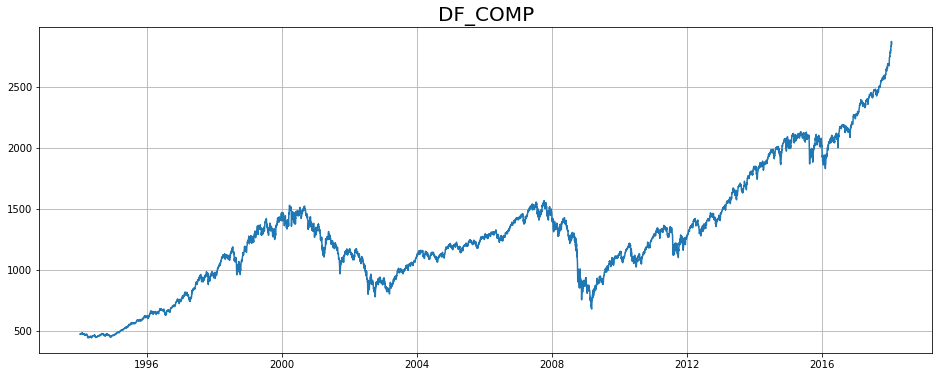

In [53]:
plt.figure(figsize = (16, 6))
plt.title('DF_COMP', size = 20)
plt.grid()
plt.plot(df_comp)

---

#### SPLITTING THE DATA - TRAIN & TEST SET

In [35]:
print(df_comp.shape)
print(int(len(df_comp) / 100 * 80))
print(int(len(df_comp) / 100 * 20))

(6277, 1)
5021
1255


In [36]:
size = int(len(df_comp) * 0.8)

In [37]:
df = df_comp.iloc[:size]

In [38]:
df_test = df_comp.iloc[size:]

In [39]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [40]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


In [41]:
print(df.shape)
print(df_test.shape)

(5021, 1)
(1256, 1)
